## Book Recommendation System

During the last few decades,with the rise of Youtube,Amazon,Netflix and many other such web services,recommender systems have taken more and more place in our lives.From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents,matching their preferences),recommender systems are today's unavoidable in our daily online journeys.

In a very general way,recommender systems are algorithms aimed at suggesting relevent items to users(items being movies to watch,text to read,products to buy or anything else depending on industries). Recommender systems are really critical in some industries as they can generate huge amount of income when they are efficient or also be a way to stand out siginificanly from competitors. The main objective is to create a movie recommendation system for users.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Read the dataset

In [2]:
column_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("u.data",sep="\t",names=column_names)
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [3]:
movie_titles=pd.read_csv("Movie_Id_Titles.unknown")
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
data=pd.merge(df,movie_titles,on="item_id")
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


## EDA - Exploratory data analysis

In [5]:
data[data["rating"]==5].count()

user_id      21203
item_id      21203
rating       21203
timestamp    21203
title        21203
dtype: int64

In [6]:
group=data["rating"].groupby(data["title"])
group.mean().sort_values(ascending=False).head(10)

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [7]:
group.count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [8]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [9]:
#pd.set_option("display.max_rows",2000)
ratings["num of ratings"]=pd.DataFrame(data.groupby("title")["rating"].count())
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


### Create a histplot for number of ratings

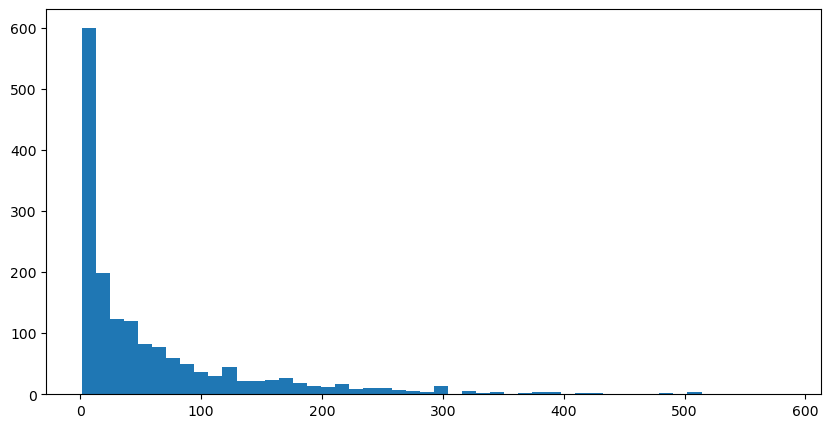

In [10]:
plt.figure(figsize=(10,5))
plt.hist(ratings["num of ratings"],bins=50)
plt.show()

### Create a histplot for rating 

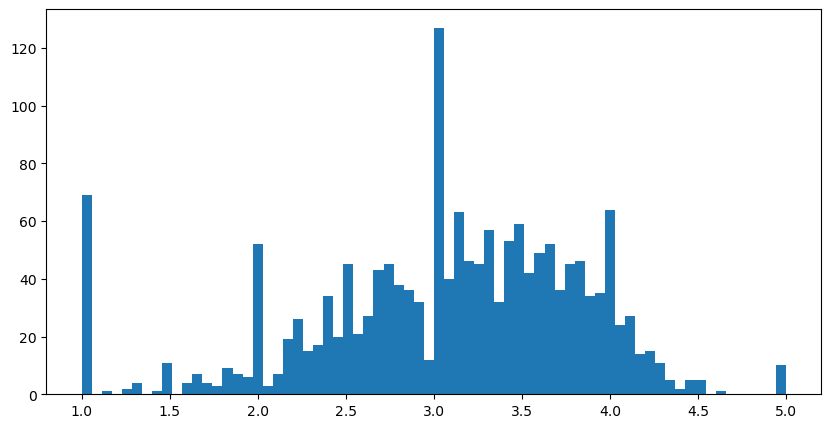

In [11]:
plt.figure(figsize=(10,5))
plt.hist(ratings["rating"],bins=70)
plt.show()

### Create a jointplot for rating vs number of ratings

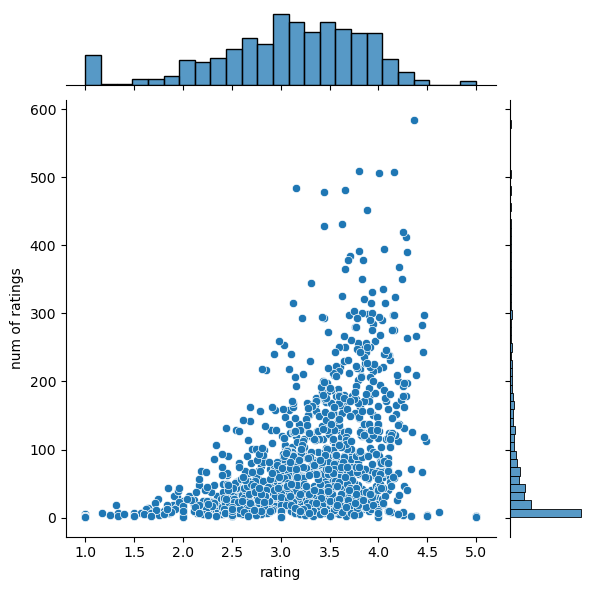

In [12]:
sns.jointplot(x="rating",y="num of ratings",data=ratings)

## Recommending Similar Movies

Now let's create a matrix that has the user id on the one axis and the movie title on another axis. Each cell will consist of the rating the user gave to that movie. (Note: There will be a lot of NaN values because most people have not seen most of the movies)

In [13]:
moviemat = data.pivot_table(index='user_id',columns="title",values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Most rated movie

In [14]:
ratings.sort_values("num of ratings",ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose three movies: starwars,toy story and fargo.

In [15]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### Now let's grab the user ratings for those three movies

In [16]:
starwars_user_ratings=moviemat["Star Wars (1977)"]
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [17]:
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)

Let's clean this by removing NaN values and using a DataFrame instead of a series

In [18]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=["correlation"])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense.. This is because there are lot of movies only watched once by users who also watched star wars(it was the most popular movie).

In [19]:
corr_starwars.sort_values("correlation",ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier)

In [20]:
corr_starwars=corr_starwars.join(ratings["num of ratings"])
corr_starwars.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [21]:
corr_starwars[corr_starwars["num of ratings"]>100].sort_values("correlation",ascending=False).head(10)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


### Now the same for ToyStory

In [22]:
toystory_user_ratings = moviemat["Toy Story (1995)"]
toystory_user_ratings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

In [23]:
similar_to_toystory=moviemat.corrwith(toystory_user_ratings)

In [24]:
corr_toystory=pd.DataFrame(similar_to_toystory,columns=["correlation"])
corr_toystory.dropna(inplace=True)
corr_toystory=corr_toystory.join(ratings["num of ratings"])
corr_toystory[corr_toystory["num of ratings"]>100].sort_values("correlation",ascending=False).head(10)

,correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129


### Now same for Fargo

In [25]:
fargo_user_ratings=moviemat["Fargo (1996)"]
fargo_user_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

In [26]:
similar_to_fargo=moviemat.corrwith(fargo_user_ratings)

In [27]:
corr_fargo=pd.DataFrame(similar_to_fargo,columns=["correlation"])
corr_fargo.dropna(inplace=True)
corr_fargo.head()

,correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [28]:
corr_fargo=corr_fargo.join(ratings["num of ratings"])


In [29]:
corr_fargo[corr_fargo["num of ratings"]>100].sort_values("correlation",ascending=False).head(10)

,correlation,num of ratings
title,,
Fargo (1996),1.000000,508
Sling Blade (1996),0.381159,136
Lone Star (1996),0.370915,187
Quiz Show (1994),0.355031,175
Lawrence of Arabia (1962),0.353408,173
True Romance (1993),0.345781,104
Raging Bull (1980),0.344163,116
"People vs. Larry Flynt, The (1996)",0.341784,215
"Magnificent Seven, The (1954)",0.338462,121
